In [10]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



In [24]:
#Load raw data
raw_data = pd.read_csv("raw_data.csv")
raw_data.head(10)

,ID,Gender,Household income,Household size,Method of accessing water,Travel time,Amount spent,Volume per day,Availability of water,Quality of water,Willingness to pay,Easting,Northing,Location
0,1,female,100000,4,carried,20,9000,180,often,good,9000.0,342450,998008,AREA_A
1,2,male,50000,4,delivered,50,4000,100,often,good,5000.0,342303,998270,AREA_A
2,3,male,85000,3,delivered,20,9000,180,not_often,good,9000.0,342321,998305,AREA_A
3,4,female,80000,5,delivered,35,8000,140,often,fair,8500.0,342344,998258,AREA_A
4,5,male,75000,4,delivered,30,7000,160,often,fair,7500.0,342362,998227,AREA_A
5,6,male,50000,4,carried,45,4000,100,often,good,5000.0,342389,998176,AREA_A
6,7,male,75000,4,carried,30,7000,160,not_often,fair,7500.0,342421,998111,AREA_A
7,8,male,75000,6,carried,20,9000,180,not_often,good,9000.0,342456,998049,AREA_A
8,9,male,NaN,NaN,carried,30,NaN,160,not_often,fair,7500.0,342484,998002,AREA_A
9,10,male,75000,6,carried,20,10000,200,often,fair,10000.0,342448,998131,AREA_A


In [93]:
print(raw_data["Method of accessing water"].unique())

['carried' 'delivered' 'well' 'inyard']


### Data Scaling

In [94]:
#Loading full data after data cleaning

full_data = pd.read_csv('full_data.csv')

# 4 samples/observations and 2 variables/features
data = full_data.iloc[0:10,]
data = data[['Household income', 'Household size']]


#Show data
print('This is unscaled data ', "\n", data, "\n")

# create scaler method using MinMax Scaler
scaler = MinMaxScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(data)

#Turn to datafram
scaled_data = pd.DataFrame(scaled_data, columns=['Household income', 'Household size'])

#Show df_data
print('This is scaled data ', "\n", scaled_data)


This is unscaled data  
    Household income  Household size
0            100000               4
1             50000               4
2             85000               3
3             80000               5
4             75000               4
5             50000               4
6             75000               4
7             75000               6
8             75000               6
9             75000               6 

This is scaled data  
    Household income  Household size
0               1.0        0.333333
1               0.0        0.333333
2               0.7        0.000000
3               0.6        0.666667
4               0.5        0.333333
5               0.0        0.333333
6               0.5        0.333333
7               0.5        1.000000
8               0.5        1.000000
9               0.5        1.000000


In [91]:
#Loading full data after data cleaning

full_data = pd.read_csv('wet_season_data.csv')

# 4 samples/observations and 2 variables/features
data = full_data.iloc[0:10,]
data = data[['ID', 
            'Household income', 
            'Household size', 
            'Rainfall',
            'Average temperature',
            'Travel time',
            'Shortest distance', 
            'Height diff',
            'Volume consumed in lpcd', 
            'Amount spent', 
            'Willingness to pay']]

#Show data
print('This is unscaled data ', "\n", data, "\n")

# create scaler method using Standard Scaler
scaler = MinMaxScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(data)

#Turn to datafram
scaled_data = pd.DataFrame(scaled_data, columns=['ID', 
            'Household income', 
            'Household size', 
            'Rainfall',
            'Average temperature',
            'Travel time',
            'Shortest distance', 
            'Height diff',
            'Volume consumed in lpcd', 
            'Amount spent', 
            'Willingness to pay'])

#print into excel csv file
scaled_data.to_csv('scaled_full_data.csv')

#Show df_data
print('This is scaled data ', "\n", scaled_data)

This is unscaled data  
    ID  Household income  Household size  Rainfall  Average temperature  \
0   1            100000               4       169                   75   
1   2             50000               4       169                   75   
2   3             85000               3       169                   75   
3   4             80000               5       169                   75   
4   5             75000               4       169                   75   
5   6             50000               4       169                   75   
6   7             75000               4       169                   75   
7   8             75000               6       169                   75   
8   9             75000               4       169                   75   
9  10             75000               6       169                   75   

   Travel time  Shortest distance  Height diff  Volume consumed in lpcd  \
0           20             136.01            4                       40   
1         

### Data Extraction

Explained Variance  [3.68939111 1.63178974 1.53015857 0.98113916 0.48463029] 

Explained Variance Ratio  [0.40959074 0.18115888 0.16987594 0.10892462 0.05380294] 

          PCA1      PCA2      PCA3      PCA4      PCA5
0    -1.897474  0.268380  1.464534  1.435375  0.682030
1     2.630676  0.036221 -0.645035  1.817436  0.247115
2    -1.548004  2.313696  2.452183  1.032219 -0.194787
3    -0.619276 -0.203697 -0.818204  1.862996  0.533393
4    -0.200884  0.313551  1.149674  1.514686  0.078984
...        ...       ...       ...       ...       ...
1195  0.121348 -1.574465 -1.201547 -1.273494 -0.092104
1196 -2.171569 -1.189277 -0.621070 -1.448181 -0.161132
1197 -0.171843 -2.010700 -0.854115 -1.191676 -0.569395
1198 -2.471509 -1.599468 -0.321814 -1.529002  0.462087
1199 -1.721558 -1.514615 -0.911768 -1.460007  0.741055

[1200 rows x 5 columns]


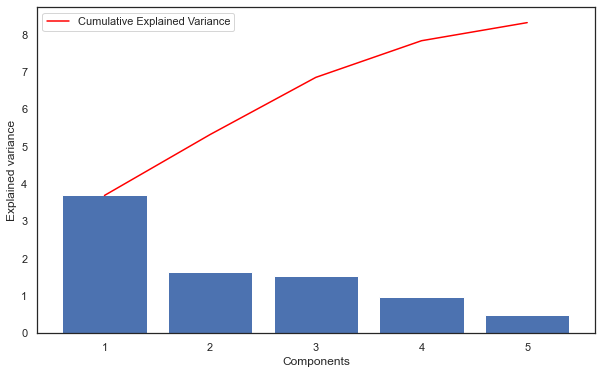

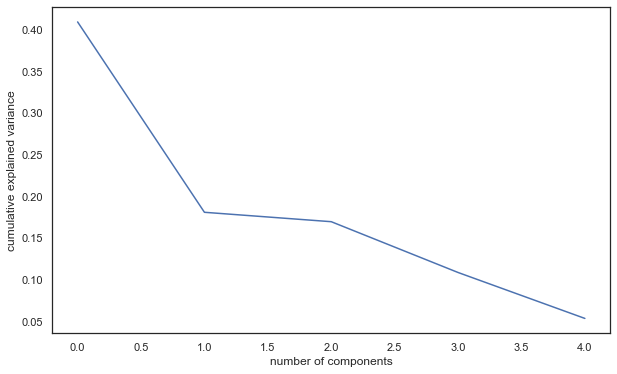

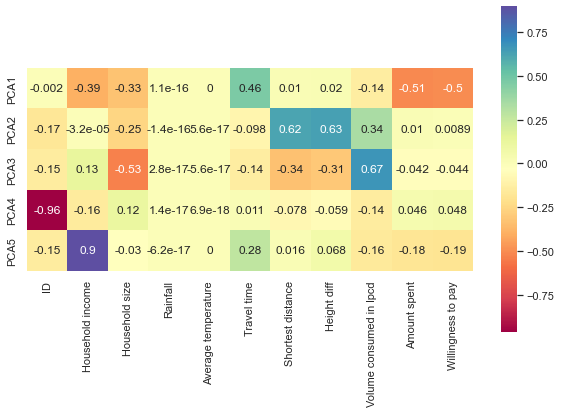

In [95]:
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Principal Component Analysis
def pca(n_components, data):
    # Scae the data
    from sklearn.preprocessing import StandardScaler
    Xscaled = StandardScaler().fit_transform(data)
    Xscaled = pd.DataFrame(Xscaled, columns=['ID', 
                            'Household income', 
                            'Household size', 
                            'Rainfall',
                            'Average temperature',
                            'Travel time',
                            'Shortest distance', 
                            'Height diff',
                            'Volume consumed in lpcd', 
                            'Amount spent', 
                            'Willingness to pay'])
    # Getting PCA components
    from sklearn.decomposition import PCA
    pcamodel = PCA(n_components)
    pca = pcamodel.fit_transform(Xscaled)
    global X # Making X global so it can be used elsewhere
    X = pd.DataFrame(pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])
    print('Explained Variance ', pcamodel.explained_variance_, "\n")
    print('Explained Variance Ratio ', pcamodel.explained_variance_ratio_, "\n")
    print(X)
    #print into excel csv file
    X.to_csv('PCA_data.csv')
    
    #Explained variance plot
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
    plt.ylabel('Explained variance')
    plt.xlabel('Components')
    plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
    plt.legend(loc='upper left')
    plt.show()
       
    #Explained Variance ratio plot
    plt.plot(pcamodel.explained_variance_ratio_)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    
    # Heatmap showing effect of variables on each component
    ax = sns.heatmap(pcamodel.components_,
                 cmap='Spectral',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(Xscaled.columns),
                 cbar_kws={"orientation": "vertical"}, annot=True)
    ax.set_aspect("equal")


#Testing the PCA code
# Loading the data
data = pd.read_csv('dry_season_data.csv')
#Separate target variable from input variables
Xfull = data.drop(columns='Volume consumed in a month in liters', axis=1)
pca(5, Xfull)    

### Feature Selection

Information Gain 
 Household income       0.701776
Household size         1.045214
Rainfall               0.000000
Average temperature    0.030619
Travel time            1.196283
Shortest distance      0.000000
Height diff            0.000000
Amount spent           1.845552
Willingness to pay     1.814931
dtype: float64 

Recursive Feature Elimination 
 Household income       1
Household size         4
Rainfall               5
Average temperature    3
Travel time            1
Shortest distance      1
Height diff            1
Amount spent           1
Willingness to pay     2
dtype: int32 



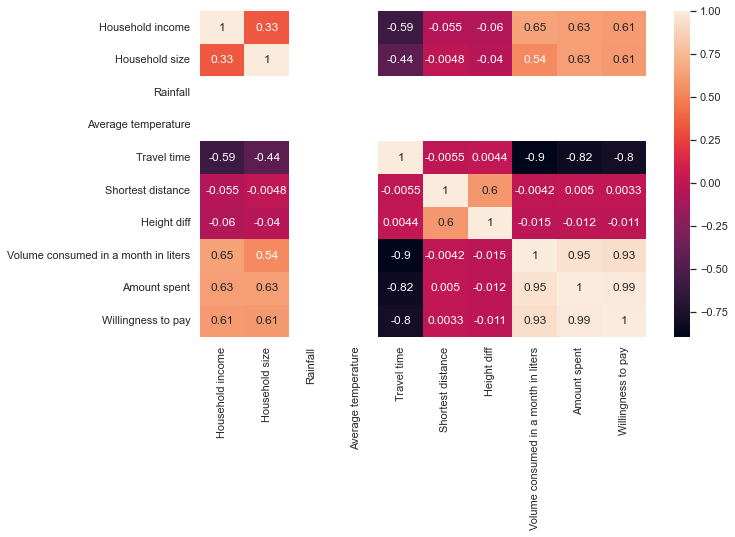

In [96]:
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Loading the data
data = pd.read_csv('dry_season_data.csv')

#Separate target variable from input variables
datafull = data.drop(columns=['ID', 
                              'Volume consumed in lpcd'], axis=1)
Xfull = datafull.drop(columns='Volume consumed in a month in liters', axis=1)
yfull= data['Volume consumed in a month in liters']

# Developing the model with Pipeline that infuses StandardScaler with SDGRegressor
model = Pipeline([('scaler', StandardScaler()), ('sgd', SGDRegressor(max_iter=10000, tol=1e-3))])

# FEATURE SELECTION
import pandas as pd
import numpy as np

# Pearson Correlation
def pearson_correlation(data):
    import matplotlib.pyplot as plt
    import seaborn as sns
    corr = data.corr()
    #Plotting heatmap
    plt.figure(figsize = (10,6))
    return sns.heatmap(corr, annot=True)
    
# Information Gain
def information_gain(x, y):
    from sklearn.feature_selection import mutual_info_classif
    from sklearn.feature_selection import SelectKBest
    # Determine the mutual information
    mutual_info = mutual_info_classif(x, y)
    # Select best five
    five_best = SelectKBest(mutual_info_classif, k=5)
    five_best.fit(x, y)
    index = x.columns[five_best.get_support()]
    score = five_best.scores_
    scores = pd.Series(score)
    scores.index = x.columns
    print("Information Gain", "\n", scores, "\n") 
    
# Recursive Feature Elimination
def recursive_feature_elimination(x, y):
    from sklearn. feature_selection import RFE
    from sklearn.linear_model import SGDRegressor
    model = SGDRegressor(max_iter=1000, tol=1e-3)
    rfe = RFE(model, n_features_to_select=5)
    fit = rfe.fit(x, y)
    # Representing in list form
    feature_ranking = pd.Series(fit.ranking_)
    feature_selected = pd.Series(fit.support_)
    feature_ranking.index = x.columns
    print("Recursive Feature Elimination", "\n", feature_ranking, "\n")

# Testing the feature selection code
pearson_correlation(datafull)
information_gain(Xfull, yfull)
recursive_feature_elimination(Xfull, yfull)
